# 결정 트리(Decision Tree)

## 데이터 불러오기

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class']
data.shape, target.shape

((6497, 3), (6497,))

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                      test_size=0.2, random_state=42, stratify=target)

In [ ]:
import numpy as np
np.bincount(train_target)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [ ]:
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
train_scaled.mean(), train_scaled.std()

(-5.87174177893216e-15, 1.0000000000000009)

## 결정 트리- 모델 1

In [ ]:
## entropy 불순도를 사용했을 때
from sklearn.tree import DecisionTreeClassifier

# no scale
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

# scale
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(train_scaled, train_target)

print(dt_scaled.score(train_input, train_target))
print(dt_scaled.score(test_input, test_target))
print(dt_scaled.score(train_scaled, train_target))
print(dt_scaled.score(test_scaled, test_target))

0.9978833942659227
0.8653846153846154
0.2461035212622667
0.24615384615384617
0.9978833942659227
0.8653846153846154


### 시각화 1

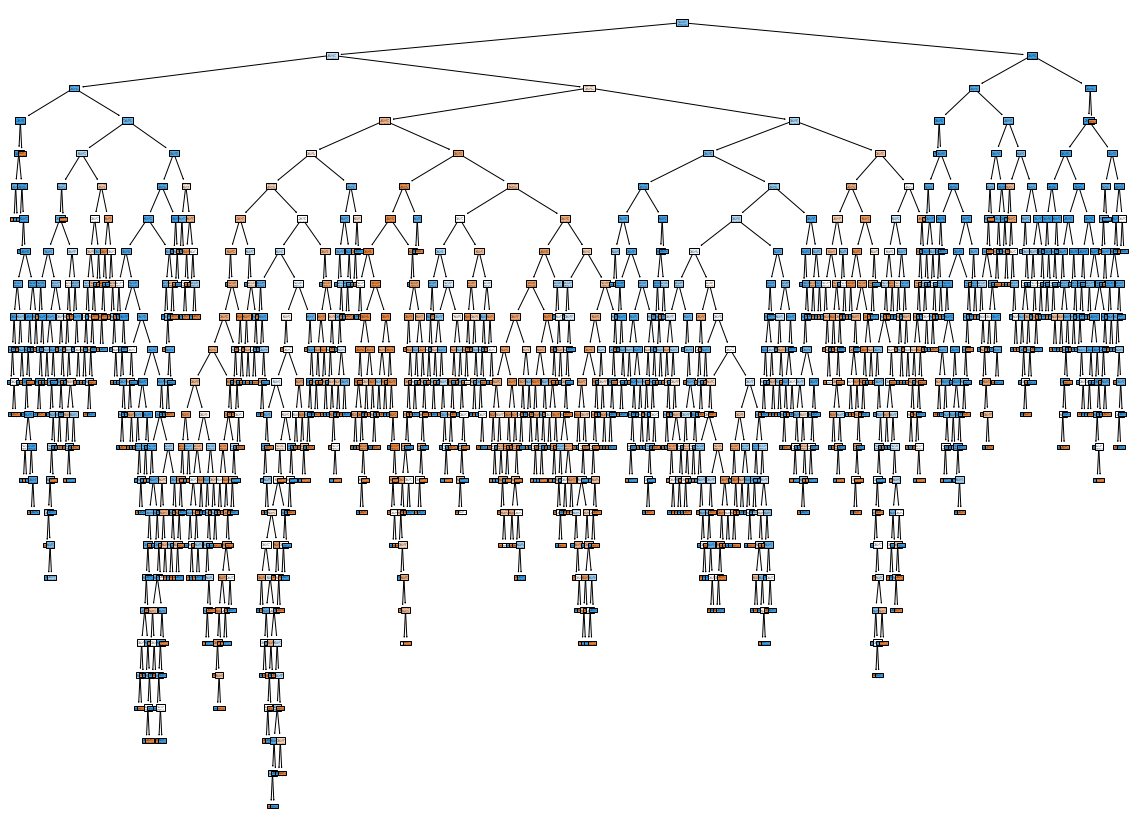

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True)
plt.show()

### 시각화 2 - `max_depth`

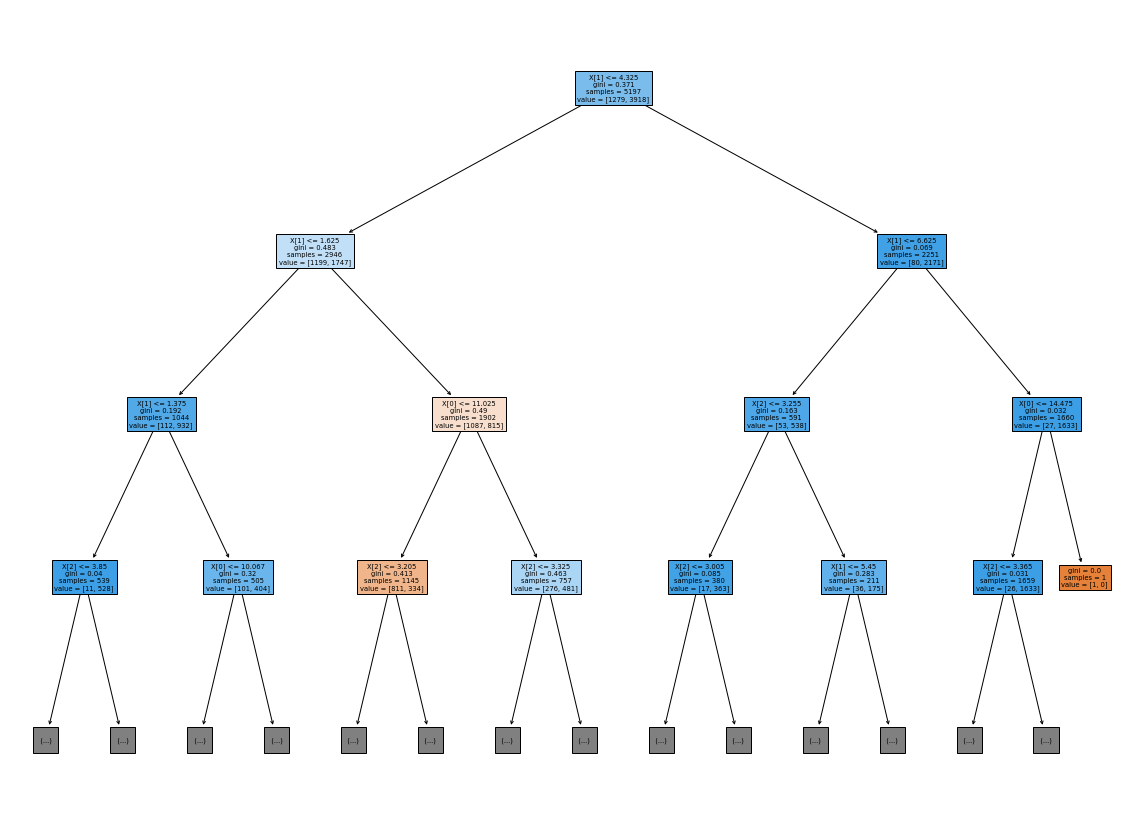

In [ ]:
fig = plt.figure(figsize=(20, 15))
plot_tree(dt, max_depth=3, filled=True)
plt.show()

### 시각화 3 - `feature_names`

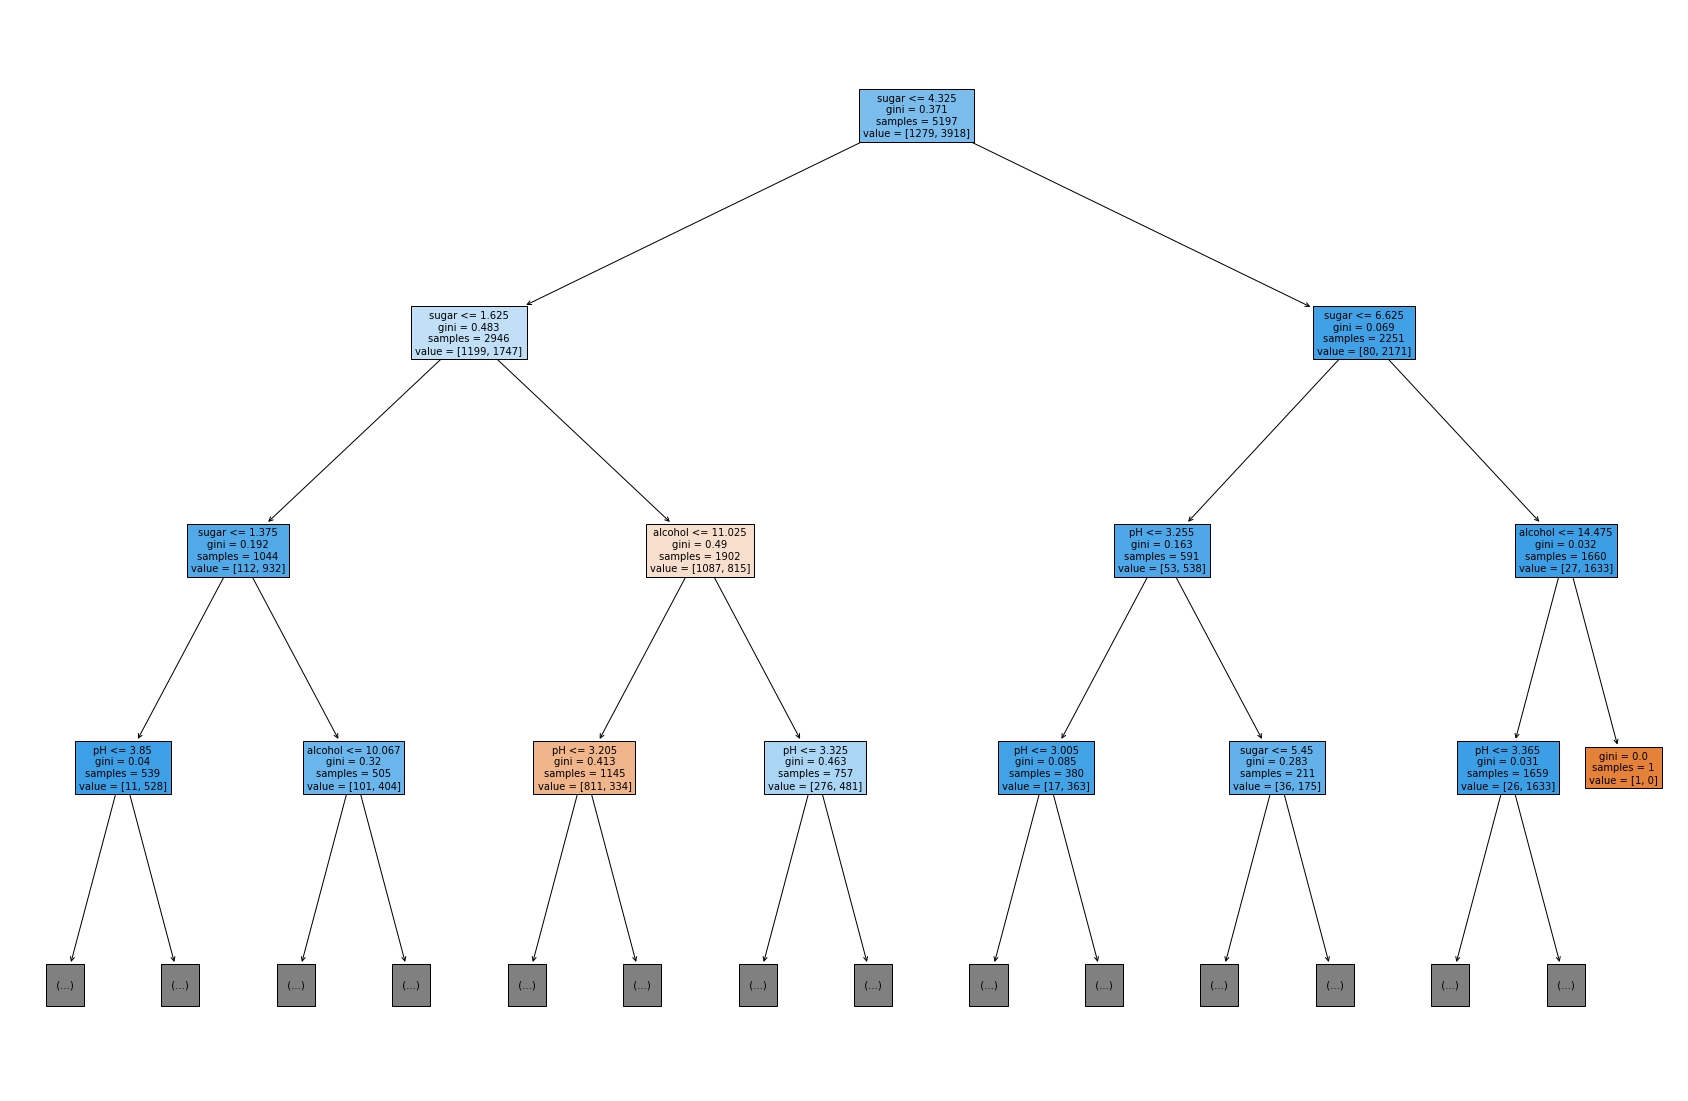

In [ ]:
fig = plt.figure(figsize=(30, 20))
plot_tree(dt, max_depth=3, filled=True,
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

## 결정 트리 - 모델 2(`max_depth`)

0.8458726188185491


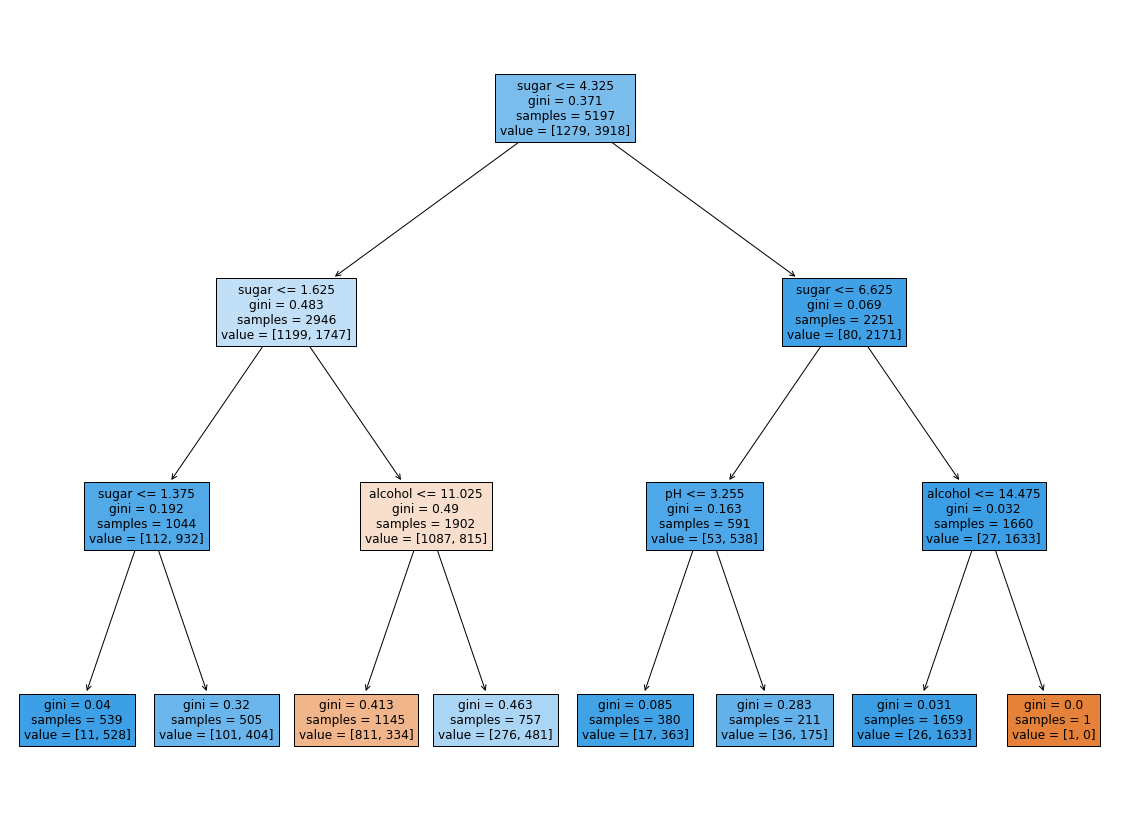

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))

fig = plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# feature importance
dt.feature_importances_

array([0.14086835, 0.85360568, 0.00552597])

In [ ]:
dt.feature_importances_.argmax()

1

In [ ]:
print('가장 중요한 특성은 {}입니다.'.format(wine.columns[dt.feature_importances_.argmax()]))

가장 중요한 특성은 sugar입니다.


## 결정 트리 - 모델 3(`min_impurity_decrease`)


In [ ]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8893592457186839
0.8569230769230769


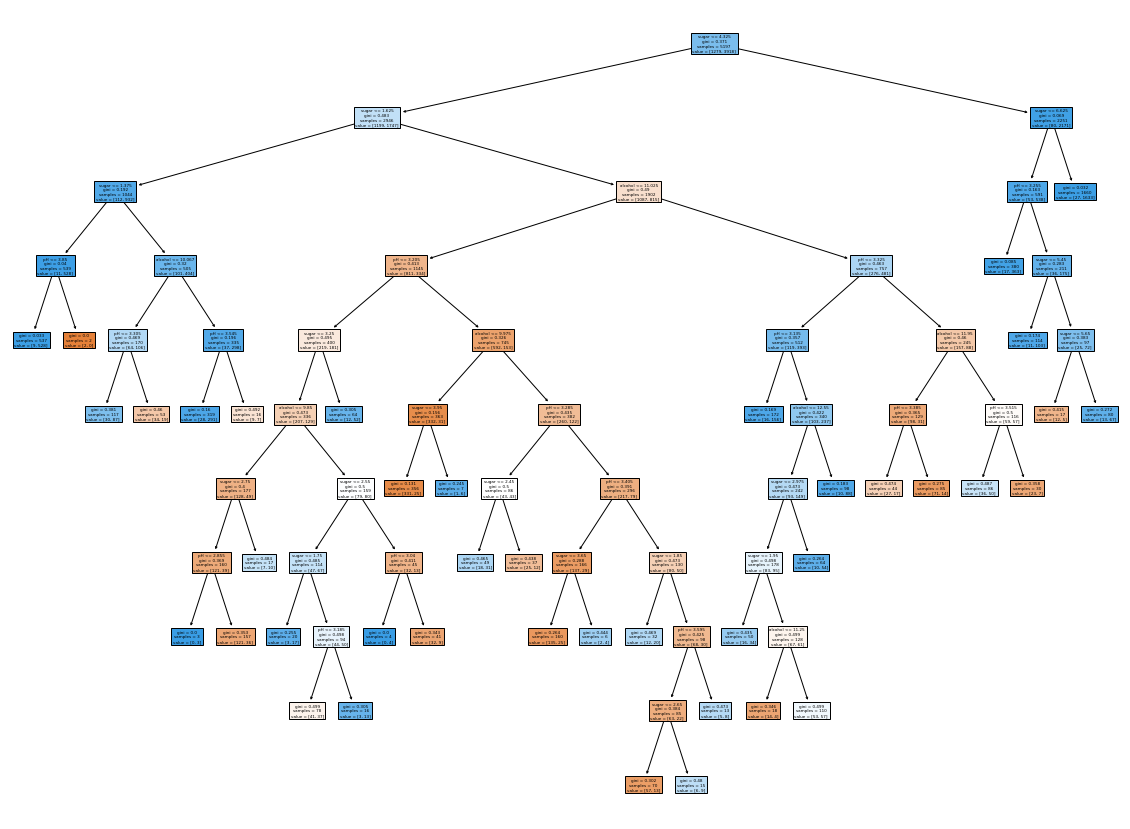

In [ ]:
fig = plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 결정 트리 실습 - Wine Data

## 데이터 불러오기

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class']
data.shape, target.shape

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target,
                                                                      test_size=0.2, random_state=42, stratify=target)

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target,
                                                                test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


## 결정 트리 모델

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9987972095261005
0.8634615384615385


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00920606, 0.00604415, 0.00576234, 0.00588036, 0.00602579]), 'score_time': array([0.00067091, 0.00056314, 0.0005064 , 0.00056005, 0.00054264]), 'test_score': array([0.86730769, 0.86923077, 0.84696824, 0.85370549, 0.84985563])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.8574135633375286


## Cross Validation - StratifieldKFold

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8574135633375286


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8576078257003111


## Grid Search I

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(gs.best_params_)

0.9326534539157206
{'min_impurity_decrease': 0.0002}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.8668433  0.87319353 0.8710774  0.86722866 0.8693446 ]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0002}


## Grid Search II

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))
print(gs.best_params_)

0.9326534539157206
{'max_depth': 19, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86318631 0.86280133 0.86318631 ... 0.86357296 0.86357296 0.86280373]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'max_depth': 19, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}
